In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv("Movies - Cleaned.csv")
ndf = df[['Title','IMDb Rating','Movie Series', 'Order']]
ndf.columns = ['Title','IMDB Rating','Movie Series', 'Order']
series_with_missing_ratings = ndf.groupby('Movie Series')['IMDB Rating'].apply(lambda x: x.isna().any())
series_to_remove = series_with_missing_ratings[series_with_missing_ratings].index
ndf_clean = ndf[~ndf['Movie Series'].isin(series_to_remove)]

# Removed all series without IMDB ratings.

In [133]:
nndf = ndf_clean.groupby('Movie Series')['Movie Series'].count()
nndf

Movie Series
101 Dalmatians      2
12 Rounds           2
21 Jump Street      2
28 Days Later...    2
30 Days of Night    1
                   ..
Young Guns          2
Zombieland          2
Zoolander           2
[Rec]               4
xXx                 2
Name: Movie Series, Length: 358, dtype: int64

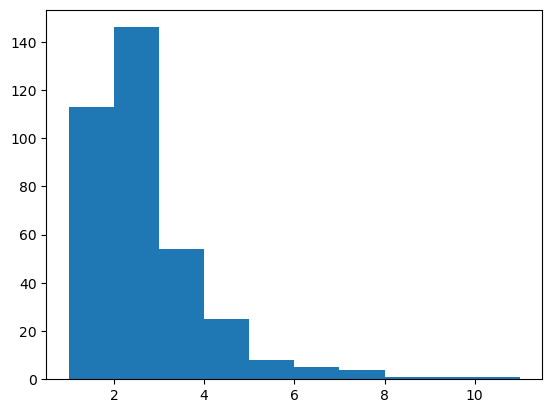

In [149]:
plt.hist(nndf);

# The above histogram clearly shows that this dataset has a lot of movies without any sequel, and hence they need to be cleaned.

In [151]:
nnndf = nndf[~(nndf.values == 1)]
nnndf

Movie Series
101 Dalmatians      2
12 Rounds           2
21 Jump Street      2
28 Days Later...    2
48 Hrs.             2
                   ..
Young Guns          2
Zombieland          2
Zoolander           2
[Rec]               4
xXx                 2
Name: Movie Series, Length: 245, dtype: int64

In [153]:
series2 = nndf[nndf.values == 2].index
series3 = nndf[nndf.values == 3].index
series4 = nndf[nndf.values == 4].index
series5 = nndf[nndf.values == 5].index

grp2 = ndf[ndf['Movie Series'].isin(series2)]
grp3 = ndf[ndf['Movie Series'].isin(series3)]
grp4 = ndf[ndf['Movie Series'].isin(series4)]
grp5 = ndf[ndf['Movie Series'].isin(series5)]

In [155]:
corr2 = grp2['Order'].corr(grp2['IMDB Rating'])
print(f"Correlation between order and rating in 2-movie series: {corr2:.2f}")

corr3 = grp3['Order'].corr(grp3['IMDB Rating'])
print(f"Correlation between order and rating in 3-movie series: {corr3:.2f}")

corr4 = grp4['Order'].corr(grp4['IMDB Rating'])
print(f"Correlation between order and rating in 4-movie series: {corr4:.2f}")

corr5 = grp5['Order'].corr(grp5['IMDB Rating'])
print(f"Correlation between order and rating in 5-movie series: {corr5:.2f}")


Correlation between order and rating in 2-movie series: -0.36
Correlation between order and rating in 3-movie series: -0.34
Correlation between order and rating in 4-movie series: -0.32
Correlation between order and rating in 5-movie series: -0.39


# The -ve correlation coefficient means that sequels generally get lower ratings than their predecessors. The increasing -ve magnitude of the correlation coefficient, as number of movies increases, means that the longer the series drags on, the worse the drop-off tends to be. 

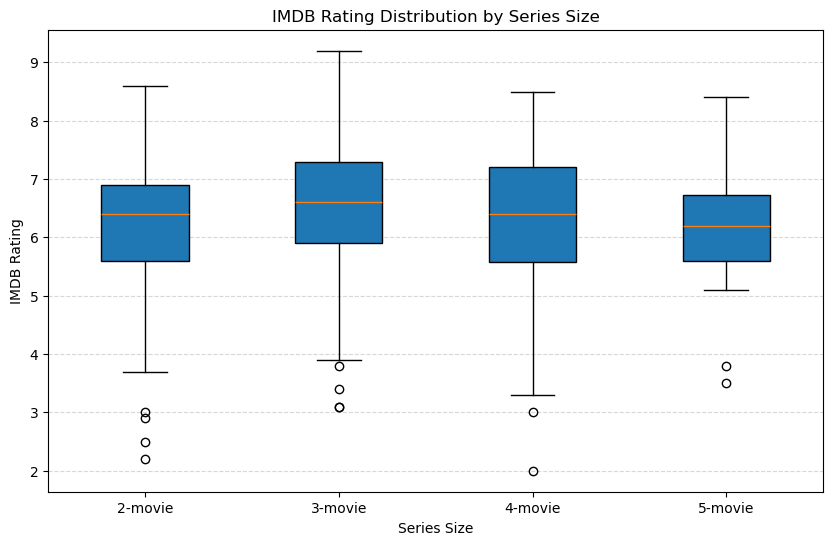

In [157]:
plt.figure(figsize=(10, 6))
plt.boxplot([grp2['IMDB Rating'], grp3['IMDB Rating'], grp4['IMDB Rating'], grp5['IMDB Rating']],
            labels=['2-movie', '3-movie', '4-movie', '5-movie'],
            patch_artist=True)

plt.title('IMDB Rating Distribution by Series Size')
plt.xlabel('Series Size')
plt.ylabel('IMDB Rating')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# This boxplot doesn't help much in drawing any conclusion.

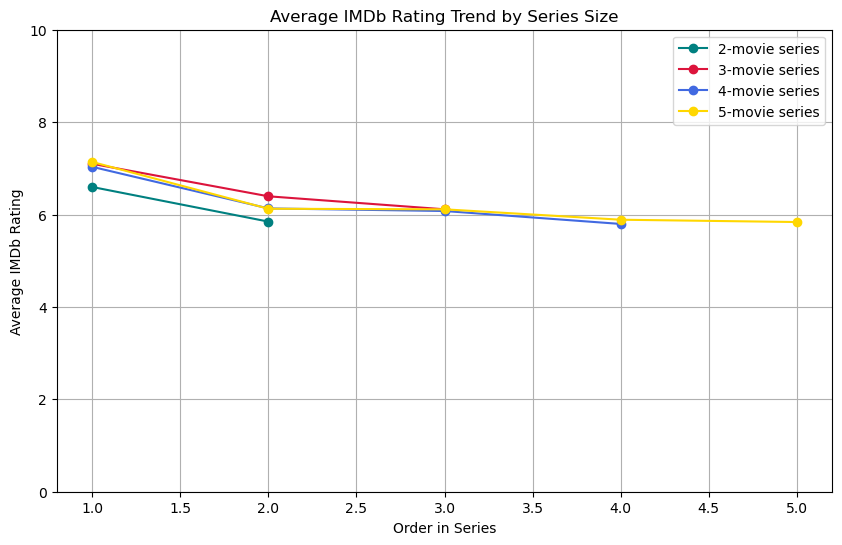

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# For each group, compute mean rating at each order and plot the line
for grp, label, color in zip(
    [grp2, grp3, grp4, grp5],
    ['2-movie series', '3-movie series', '4-movie series', '5-movie series'],
    ['teal', 'crimson', 'royalblue', 'gold']
):
    avg_ratings = grp.groupby('Order')['IMDB Rating'].mean()
    plt.plot(avg_ratings.index, avg_ratings.values, marker='o', label=label, color=color)

plt.title('Average IMDb Rating Trend by Series Size')
plt.xlabel('Order in Series')
plt.ylabel('Average IMDb Rating')
plt.ylim(0, 10)
plt.grid(True)
plt.legend()
plt.show()


# The downward slope of these lineplots clearly points towards detoriating quality of films with increasing number of sequels.